### Student Information
Name: 林湧 / Bijon Setyawan Raya

Student ID: 104062181

GitHub ID: john_bjohn

# Lab 1 take home exercises

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example':  ''   }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

NameError: name 'pd' is not defined

In [ ]:
NA_df['missing_example'].isnull()

## answer:
Because .isnull() doesn't consider string type value even if the value is 'Nan', 'None', or ''.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

## answer:

In [ ]:
X.diff

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [ ]:
# Answer here
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

![alt txt](https://i.imgur.com/9eO431H.png)

In [ ]:
df = pd.DataFrame({'X': X.category_name.value_counts(),
                   'X_sample': X_sample.category_name.value_counts()
                  })
ax = df.plot.bar(rot=0)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
print(X_counts[np.where(1)])

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

_ =ax.scatter(X_reduced3[:,0], X_reduced3[:,1], X_reduced3[:,2])
_ =ax.set_xlabel('Component 1')
_ =ax.set_ylabel('Component 2')
_ =ax.set_zlabel('Component 3')

plt.show()

When we do the 3d plot, we can noticed that the points are well separated when considering the first dimension, a bit less considering the second one, and the third component is the worst of the 3. It must be because the PCA algorithm rank the component by importance, so the firt one have the best ability to separate the data point, and the further we go in the ranking, the less the quality of the separation is. 

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [ ]:
# Answer here
# Creating a dataframe containing the words and the corresponding frequencies
frequency_vs_labels = pd.DataFrame({'labels':count_vect.get_feature_names(), 'frequency':term_frequencies})

# Sorting the dataframe by the frequencies, and keeping only the top 300
top_300_frequencies = frequency_vs_labels.sort_values("frequency",ascending=False).iloc()[:300]
top_300_frequencies['frequency_log'] = [math.log(i) for i in list(top_300_frequencies['frequency'])]

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here
# Plotting the top 300 words sorted by frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=top_300_frequencies['labels'], 
            y=top_300_frequencies['frequency_log'])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here
# If we only deploy the LabelBinarizer trained on the column category to do the binarization on the column 
# category_name its not working. All the returned values are same.
# To make it work, we have to retrain the LabelBinarizer on the category_name like this :

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)

mlb.classes_

X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

---

# Homework 1

## Part 1

In [4]:
%load_ext autoreload
%autoreload 2

## 1. Data Exploration and Data Operation Techniques

In [5]:
import numpy as np
import pandas as pd

# reading the datasets file and convert it to dataframes right away
amazon_dataset = pd.read_csv('sentiment_labelled_sentences/amazon_cells_labelled.txt', header = None, delimiter = '\t', names = ['text', 'category'])
imdb_dataset = pd.read_csv('sentiment_labelled_sentences/imdb_labelled.txt', header = None, delimiter = '\t', names = ['text', 'category'])
yelp_dataset = pd.read_csv('sentiment_labelled_sentences/yelp_labelled.txt', header = None, delimiter = '\t', names = ['text', 'category'])

# changing the representation of the target
amazon_dataset['category'] = amazon_dataset['category'].replace({0: '-', 1: '+'})
imdb_dataset['category'] = imdb_dataset['category'].replace({0: '-', 1: '+'})
yelp_dataset['category'] = yelp_dataset['category'].replace({0: '-', 1: '+'})

In [107]:
# Check all datasets length
print("There are " + str(len(amazon_dataset)) + " data in Amazon dataset")
print("There are " + str(len(imdb_dataset)) + " data in IMDB dataset")
print("There are " + str(len(yelp_dataset)) + " data in Yelp dataset")
amazon_dataset.head()

There are 980 data in Amazon dataset
There are 742 data in IMDB dataset
There are 992 data in Yelp dataset


,text,category
0,So there is no way for me to plug it in here i...,-
1,"Good case, Excellent value.",+
2,Great for the jawbone.,+
3,Tied to charger for conversations lasting more...,-
4,The mic is great.,+


In [7]:
# the statistics of amazon dataset
amazon_positive_comments = len(amazon_dataset[amazon_dataset['category'] == '+'])
amazon_negative_comments = len(amazon_dataset[amazon_dataset['category'] == '-'])

# the statistics of imdb dataset
imdb_positive_comments = len(imdb_dataset[imdb_dataset['category'] == '+'])
imdb_negative_comments = len(imdb_dataset[imdb_dataset['category'] == '-'])

# the statistics of yelp dataset
yelp_positive_comments = len(yelp_dataset[yelp_dataset['category'] == '+'])
yelp_negative_comments = len(yelp_dataset[yelp_dataset['category'] == '-'])

print(amazon_positive_comments)
print(amazon_negative_comments)
print(imdb_positive_comments)
print(imdb_negative_comments)
print(yelp_positive_comments)
print(yelp_negative_comments)

# query some of the positive comments from each dataset
print(amazon_dataset[amazon_dataset['category'] == '+'][::-100])
print(imdb_dataset[imdb_dataset['category'] == '+'][::100])
print(yelp_dataset[yelp_dataset['category'] == '+'][::-200])

500
500
386
362
500
500
                                                  text category
978  It fits so securely that the ear hook does not...        +
777                                        WORTHWHILE.        +
574  I've had no trouble accessing the Internet, do...        +
383  After trying many many handsfree gadgets this ...        +
195         Light weight, I hardly notice it is there.        +
                                                  text category
4    The best scene in the movie was when Gerardo i...        +
214  Not too screamy not to masculine but just righ...        +
462  This is a witty and delightful adaptation of t...        +
621  The characters are fleshed out surprisingly we...        +
                                                  text category
922  Every time I eat here, I see caring teamwork t...        +
530                     Everything was good and tasty!        +
177  The atmosphere is modern and hip, while mainta...        +


In [8]:
import helpers.data_mining_helpers as dmh

print(amazon_dataset.iloc[::10, :][:5].isnull())
print(imdb_dataset.iloc[::10, :][:5].isnull())
print(yelp_dataset.iloc[::10, :][:5].isnull())

print(amazon_dataset.isnull().apply(lambda x: dmh.check_missing_values(x)))
print(imdb_dataset.isnull().apply(lambda x: dmh.check_missing_values(x)))
print(yelp_dataset.isnull().apply(lambda x: dmh.check_missing_values(x)))

     text  category
0   False     False
10  False     False
20  False     False
30  False     False
40  False     False
     text  category
0   False     False
10  False     False
20  False     False
30  False     False
40  False     False
     text  category
0   False     False
10  False     False
20  False     False
30  False     False
40  False     False
text        (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 0)
dtype: object
text        (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 0)
dtype: object
text        (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 0)
dtype: object


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()

for i in amazon_dataset["text"][:10]:
    print(analyze(i))
    
for i in imdb_dataset["text"][:10]:
    print(analyze(i))
    
for i in yelp_dataset["text"][:10]:
    print(analyze(i))

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'for', 'the', 'jawbone']
['tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes', 'major', 'problems']
['the', 'mic', 'is', 'great']
['have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume']
['if', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts', 'then', 'imagine', 'the', 'fun', 'of', 'sending', 'each', 'of', 'them', 'one', 'by', 'one']
['if', 'you', 'are', 'razr', 'owner', 'you', 'must', 'have', 'this']
['needless', 'to', 'say', 'wasted', 'my', 'money']
['what', 'waste', 'of', 'money', 'and', 'time']
['very', 'very', 'very', 'slow', 'moving', 'aimless', 'movie', 'about', 'distressed', 'drifting', 'young', 'man']
['not', 'sure', 'who', 'was', 'more', 'lost', 'the', 'flat', 'charac

In [10]:
# Prior duplication removal
print("Amazon dataset duplicated data : " + str(sum(amazon_dataset['text'].duplicated())))
print("IMDB dataset duplicated data: " + str(sum(imdb_dataset['text'].duplicated())))
print("Yelp dataset duplicated data: " + str(sum(yelp_dataset['text'].duplicated())))

Amazon dataset duplicated data : 10
IMDB dataset duplicated data: 3
Yelp dataset duplicated data: 4


In [93]:
amazon_dataset.drop_duplicates(keep=False, inplace=True)
imdb_dataset.drop_duplicates(keep=False, inplace=True)
yelp_dataset.drop_duplicates(keep=False, inplace=True)

# After duplication removal
print("Amazon dataset duplicated data : " + str(sum(amazon_dataset['text'].duplicated())))
print("IMDB dataset duplicated data: " + str(sum(imdb_dataset['text'].duplicated())))
print("Yelp dataset duplicated data: " + str(sum(yelp_dataset['text'].duplicated())))

Amazon dataset duplicated data : 0
IMDB dataset duplicated data: 0
Yelp dataset duplicated data: 0


In [12]:
amazon_word_counts = count_vect.fit_transform(amazon_dataset['text'])
imdb_word_counts = count_vect.fit_transform(imdb_dataset['text'])
yelp_word_counts = count_vect.fit_transform(yelp_dataset['text'])

print(amazon_word_counts.shape)
print(imdb_word_counts.shape)
print(yelp_word_counts.shape)

(980, 1845)
(742, 3047)
(992, 2035)


In [13]:
count_vect.get_feature_names()[0:20]

['00',
 '10',
 '100',
 '11',
 '12',
 '15',
 '17',
 '1979',
 '20',
 '2007',
 '23',
 '30',
 '30s',
 '35',
 '40',
 '40min',
 '45',
 '4ths',
 '5lb',
 '70']

---

## Part 2

### 2.1 Data Visualization

There are two techniques used in this data visualization:
1. Bar Graph
2. Word Cloud

Before visualizing all of these comments, the stopwords from these comments should be removed using NLTK in order to get a better visualization.

In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')

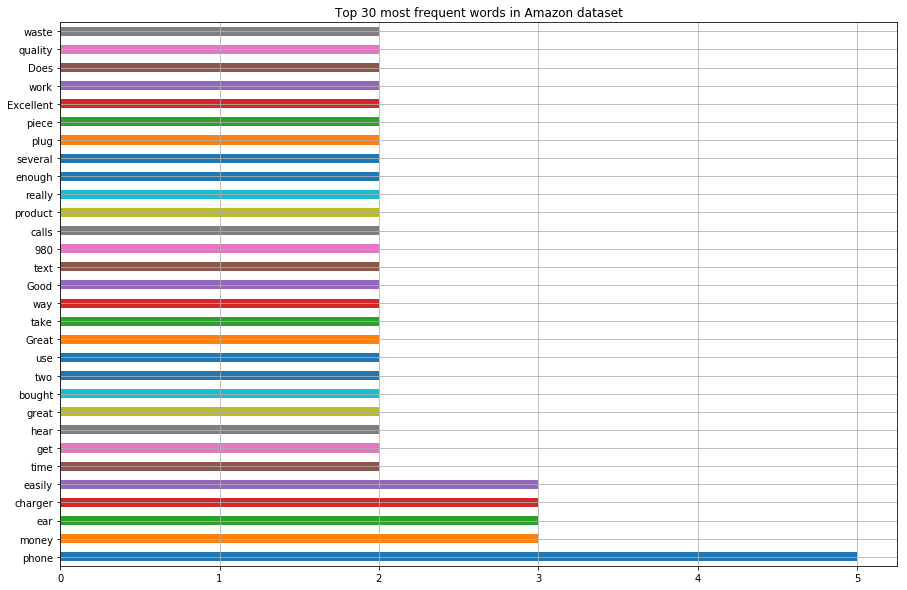

In [44]:
amazon_dataset_stopwords = [".", ",", "...", "!", "?", "The", "I", "If", "n't", "So", "th", "What", "You", "though", "bu", ":", "It", "2", "7", "c", "one"]
for stopword in amazon_dataset_stopwords:
    stop.append(stopword)

tokenized_amazon_comments = word_tokenize(str(amazon_dataset['text'][:]))

# take only the first 30 most frequent words in Amazon dataset
amazon_dataset_words = pd.Series(' '.join([word for word in tokenized_amazon_comments if not word in stop]).split()).value_counts()[:30]
amazon_dataset_words.plot(kind='barh', grid = True, figsize=(15,10), title='Top 30 most frequent words in Amazon dataset')

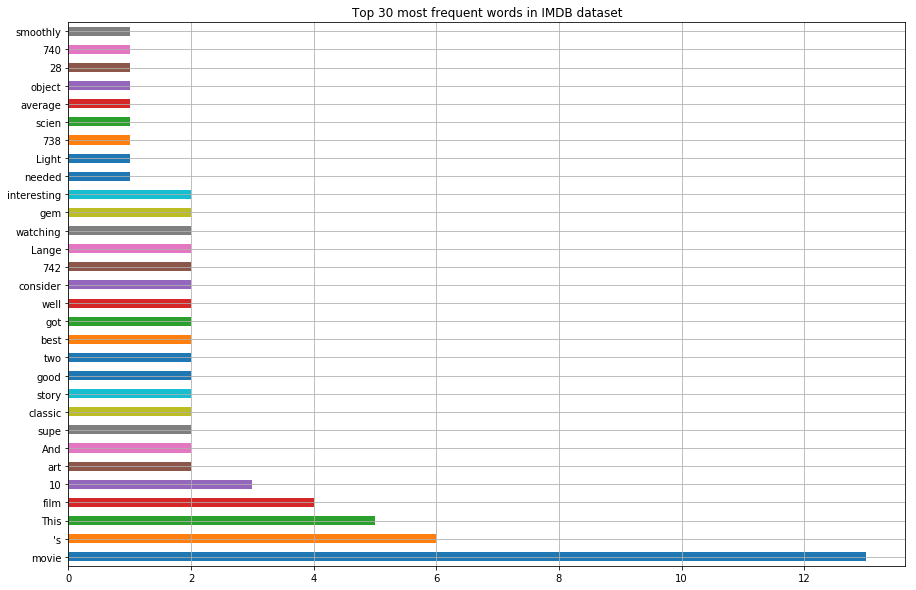

In [45]:
imdb_dataset_stopword = ['de', 'Hugo', 'Not', "'ve", "given", "S", ")", "A", "Still", "17", "15", "Were"]

for stopword in imdb_dataset_stopword:
    stop.append(stopword)
    
tokenized_imdb_comments = word_tokenize(str(imdb_dataset['text'][:]))

# take only the first 30 most frequent words in IMDB dataset
imdb_dataset_words = pd.Series(' '.join([word for word in tokenized_imdb_comments if not word in stop]).split()).value_counts()[:30]
imdb_dataset_words.plot(kind='barh', grid = True, figsize=(15,10), title='Top 30 most frequent words in IMDB dataset')

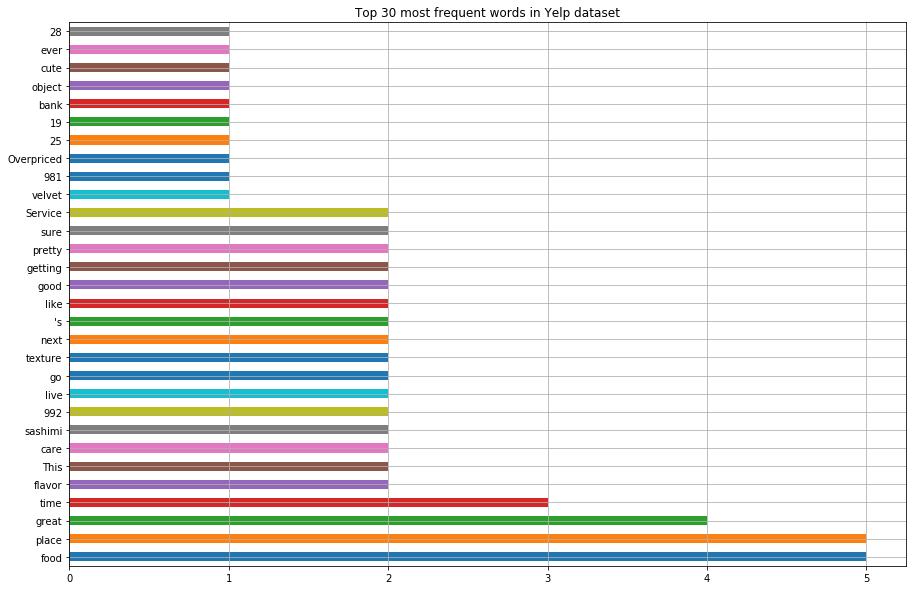

In [46]:
yelp_comments_stopword = ['24', '4', 'would', 'could', '14', 'us']

for stopword in yelp_comments_stopword:
    stop.append(stopword)

tokenized_yelp_comments = word_tokenize(str(yelp_dataset['text'][:]))

# take only the first 30 most frequent words in Yelp dataset
yelp_dataset_words = pd.Series(' '.join([word for word in tokenized_yelp_comments if not word in stop]).split()).value_counts()[:30]
yelp_dataset_words.plot(kind='barh', grid = True, figsize=(15,10), title='Top 30 most frequent words in Yelp dataset')

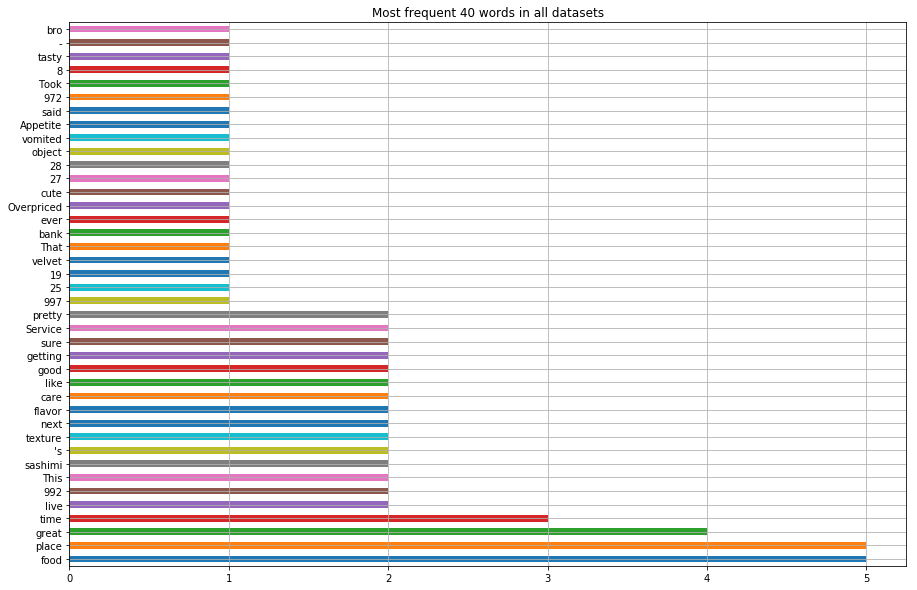

In [47]:
dataframes = [amazon_dataset, imdb_dataset, yelp_dataset]

all_datasets = pd.concat(dataframes)

all_comments_stopword = ['971', '995', '981', 'When', 'go', 'Overall', '975', 'also', 'get', '988']

for stopword in all_comments_stopword:
    stop.append(stopword)

tokenized_all_comments = word_tokenize(str(all_datasets['text'][:]))

# take only the first 40 most frequent words in all dataset
concatenated_datasets = pd.Series(' '.join([word for word in tokenized_yelp_comments if not word in stop]).split()).value_counts()[:40]
concatenated_datasets.plot(kind='barh', grid = True, title='Most frequent 40 words in all datasets', figsize=(15,10))

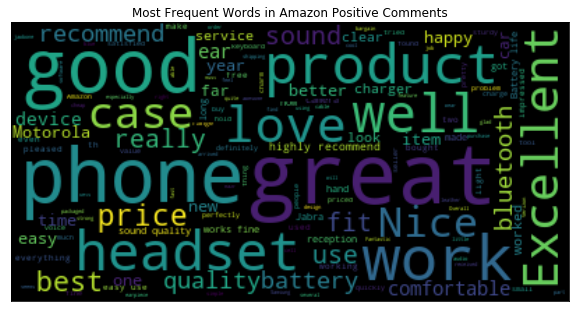

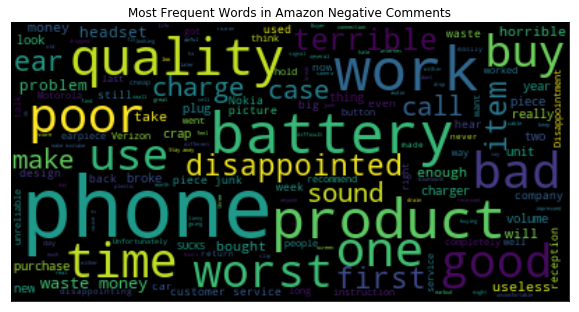

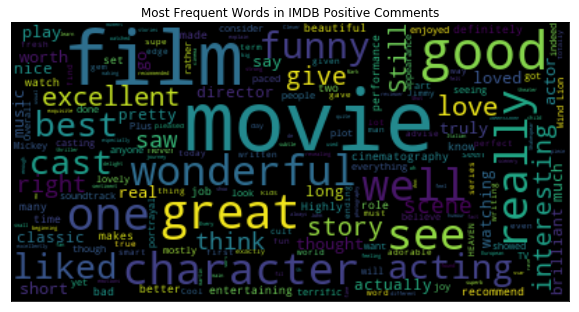

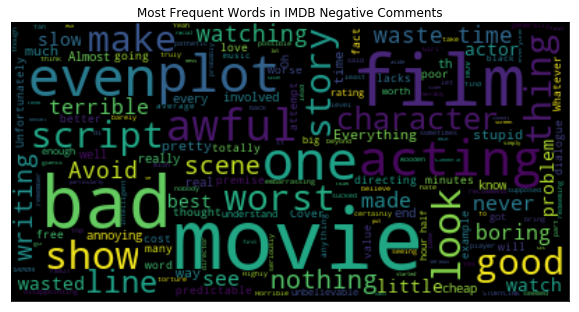

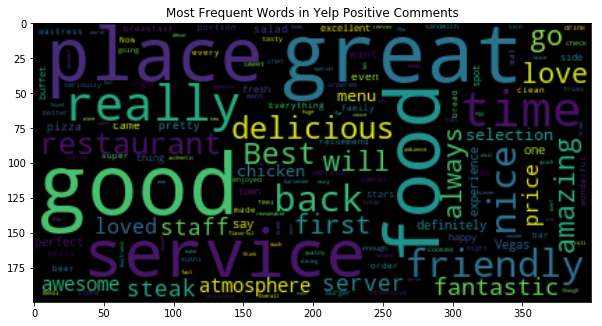

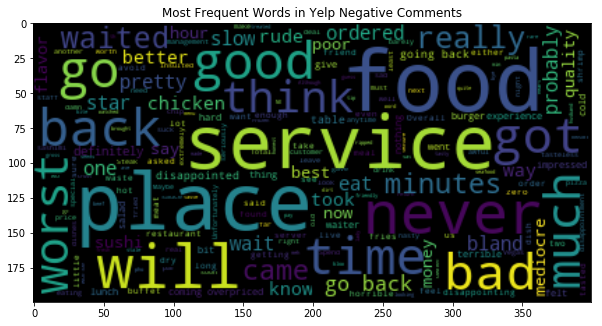

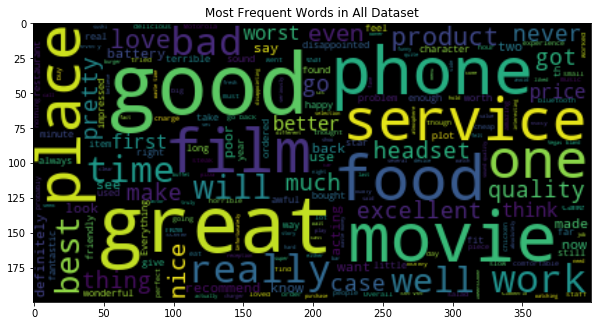

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Amazon's positive word frequencies
amazon_positive_words = amazon_dataset[amazon_dataset['category'] == '+'].to_string()
amazon_positive_wordcloud = WordCloud(max_font_size=60).generate(amazon_positive_words)
_ = plt.figure(figsize=(10,8))
_ = plt.imshow(amazon_positive_wordcloud, interpolation = 'bilinear')
_ = plt.title('Most Frequent Words in Amazon Positive Comments')
_ = plt.xticks([])
_ = plt.yticks([])

# Amazon's negative word frequencies
amazon_negative_words = amazon_dataset[amazon_dataset['category'] == '-'].to_string()
amazon_negative_wordcloud = WordCloud(max_font_size=60).generate(amazon_negative_words)
_ = plt.figure(figsize=(10,8))
_ = plt.imshow(amazon_negative_wordcloud, interpolation = 'bilinear')
_ = plt.title('Most Frequent Words in Amazon Negative Comments')
_ = plt.xticks([])
_ = plt.yticks([])

# IMDB's positive word frequencies
imdb_positive_words = imdb_dataset[imdb_dataset['category'] == '+'].to_string()
imdb_positive_wordcloud = WordCloud(max_font_size=60).generate(imdb_positive_words)
_ = plt.figure(figsize=(10,8))
_ = plt.imshow(imdb_positive_wordcloud, interpolation = 'bilinear')
_ = plt.title('Most Frequent Words in IMDB Positive Comments')
_ = plt.xticks([])
_ = plt.yticks([])

# IMDB's negative word frequencies
imdb_negative_words = imdb_dataset[imdb_dataset['category'] == '-'].to_string()
idmb_negative_wordcloud = WordCloud(max_font_size=60).generate(imdb_negative_words)
_ = plt.figure(figsize=(10,8))
_ = plt.imshow(idmb_negative_wordcloud, interpolation = 'bilinear')
_ = plt.title('Most Frequent Words in IMDB Negative Comments')
_ = plt.xticks([])
_ = plt.yticks([])

# Yelp's positive word frequencies
yelp_positive_words = yelp_dataset[yelp_dataset['category'] == '+'].to_string()
yelp_positive_wordcloud = WordCloud(max_font_size=60).generate(yelp_positive_words)
plt.figure(figsize=(10,8))
plt.imshow(yelp_positive_wordcloud, interpolation = 'bilinear')
plt.title('Most Frequent Words in Yelp Positive Comments')

# Yelp's negative word frequencies
yelp_negative_words = yelp_dataset[yelp_dataset['category'] == '-'].to_string()
yelp_negative_wordcloud = WordCloud(max_font_size=60).generate(yelp_negative_words)
_ = plt.figure(figsize=(10,8))
_ = plt.imshow(yelp_negative_wordcloud, interpolation = 'bilinear')
_ = plt.title('Most Frequent Words in Yelp Negative Comments')

# All comments word frequencies
all_words = all_datasets.to_string()
all_dataset_wordcloud = WordCloud(max_font_size=60).generate(all_words)
_ = plt.figure(figsize=(10,8))
_ = plt.imshow(all_dataset_wordcloud, interpolation='bilinear')
_ = plt.title('Most Frequent Words in All Dataset')

## 2.1 Generating TF-IDF & Word Frequency Features

### Generating TF-IDF of each words of each dataset

In [89]:
# generate TF-IDF of each word from each document
import math
import nltk
from textblob import TextBlob as tb

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

amazon_comment_string = ' '.join([word for word in tokenized_amazon_comments if not word in stop])
imdb_comment_string = ' '.join([word for word in tokenized_imdb_comments if not word in stop])
yelp_comment_string = ' '.join([word for word in tokenized_yelp_comments if not word in stop])

amazon_comment_string = tb(amazon_comment_string) # first document
imdb_comment_string = tb(imdb_comment_string) # second document
yelp_comment_string = tb(yelp_comment_string) # third document
    
bloblist = [amazon_comment_string, imdb_comment_string, yelp_comment_string]

for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i+1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:10]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

Top words in document 1
	Word: phone, TF-IDF: 0.01071
	Word: PHONE, TF-IDF: 0.01071
	Word: Phone, TF-IDF: 0.01071
	Word: Great, TF-IDF: 0.00612
	Word: Good, TF-IDF: 0.00459
	Word: charger, TF-IDF: 0.00459
	Word: ear, TF-IDF: 0.00459
	Word: way, TF-IDF: 0.00306
	Word: plug, TF-IDF: 0.00306
	Word: Excellent, TF-IDF: 0.00306
Top words in document 2
	Word: movie, TF-IDF: 0.01905
	Word: Movie, TF-IDF: 0.01905
	Word: film, TF-IDF: 0.00544
	Word: Best, TF-IDF: 0.00408
	Word: art, TF-IDF: 0.00272
	Word: consider, TF-IDF: 0.00272
	Word: gem, TF-IDF: 0.00272
	Word: interesting, TF-IDF: 0.00272
	Word: well, TF-IDF: 0.00272
	Word: supe, TF-IDF: 0.00272
Top words in document 3
	Word: food, TF-IDF: 0.00878
	Word: Food, TF-IDF: 0.00878
	Word: Service, TF-IDF: 0.00439
	Word: service, TF-IDF: 0.00439
	Word: texture, TF-IDF: 0.00293
	Word: getting, TF-IDF: 0.00293
	Word: THAT, TF-IDF: 0.00293
	Word: care, TF-IDF: 0.00293
	Word: That, TF-IDF: 0.00293
	Word: sashimi, TF-IDF: 0.00293


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
amazon_tfidf_vector = tfidf_vectorizer.fit_transform(amazon_dataset['text'][0:])
imdb_tfidf_vector = tfidf_vectorizer.fit_transform(imdb_dataset['text'][0:])
yelp_tfidf_vector = tfidf_vectorizer.fit_transform(yelp_dataset['text'][0:])

TF-IDF value of each word per document will be shown down below

In [22]:
print(amazon_tfidf_vector[0])

  (0, 1489)	0.19140858968288985
  (0, 1607)	0.22914933107417576
  (0, 853)	0.11717659872292288
  (0, 1073)	0.21408861388915978
  (0, 1764)	0.2663275333283891
  (0, 652)	0.14616243210220933
  (0, 992)	0.20728409623953437
  (0, 1638)	0.1270209584562051
  (0, 1210)	0.24773843220128242
  (0, 856)	0.10690200352068094
  (0, 813)	0.31489347703392695
  (0, 761)	0.2878754910180688
  (0, 1602)	0.09030260323141764
  (0, 1712)	0.3112949887470082
  (0, 1700)	0.298105811601252
  (0, 710)	0.2724494622231399
  (0, 232)	0.2609276093470387
  (0, 366)	0.32988408987411494


In [23]:
print(imdb_tfidf_vector[0])

  (0, 2871)	0.5412898385918822
  (0, 2404)	0.2763415429036882
  (0, 1750)	0.29275544781108404
  (0, 92)	0.33745425889736663
  (0, 1748)	0.1323394906996937
  (0, 37)	0.19381761922989987
  (0, 748)	0.33745425889736663
  (0, 786)	0.33745425889736663
  (0, 3037)	0.29275544781108404
  (0, 1639)	0.2500480293666259


In [24]:
print(yelp_tfidf_vector[0])

  (0, 2012)	0.6764849955700227
  (0, 1046)	0.5714363303542541
  (0, 1798)	0.31418342485883977
  (0, 1330)	0.3422241175952683


### Vectorizing all the words and show it on a Heatmap

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
all_datasets_vector = vectorizer.fit_transform(all_datasets['text'])

,text,category
0,So there is no way for me to plug it in here i...,-
1,"Good case, Excellent value.",+
2,Great for the jawbone.,+
3,Tied to charger for conversations lasting more...,-
4,The mic is great.,+


In [51]:
all_datasets_vector.shape

(2714, 5153)

In [53]:
vectorizer.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [85]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]

In [86]:
plot_y = ["doc_"+ str(i) for i in list(all_datasets.index)[0:50]]

In [87]:
plot_z = all_datasets_vector[0:50:,0:50].toarray()

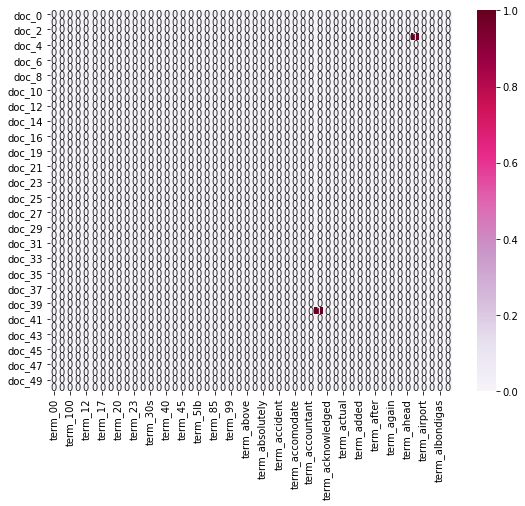

In [88]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# Dimensionality Reduction

Since there are so many columns in one dataframe which also means we have so many attributes. Having so many attributes meaning we have a curse of dimentionality. Therefore, we should reduce the dimensionality into two and three dimensions using PCA.

In [108]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(all_datasets_vector.toarray())

In [109]:
X_reduced.shape

(2714, 2)

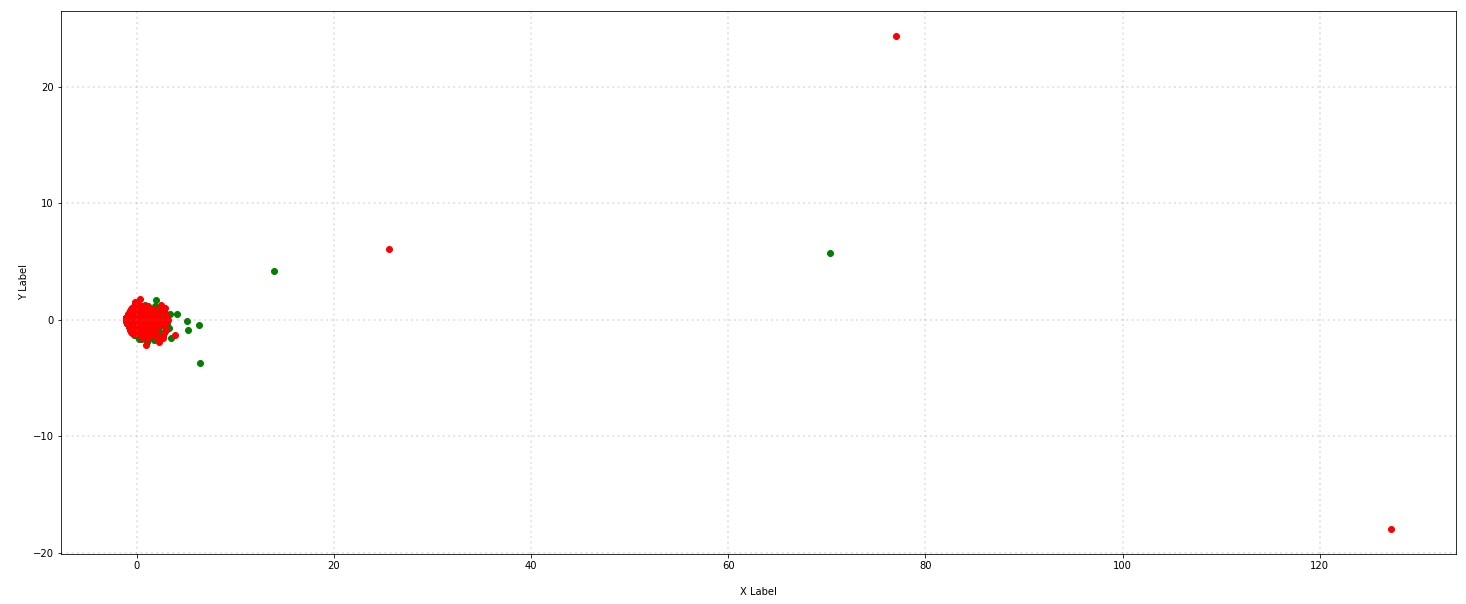

In [114]:
col = ["green", "red"]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
categories = ['+', '-']

for c, category in zip(col, categories):
    xs = X_reduced[all_datasets['category'] == category].T[0]
    ys = X_reduced[all_datasets['category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Since there are so many red dots in place, we need to reduce the dimensionality into three and map it into a 3D graph like it is shown below.

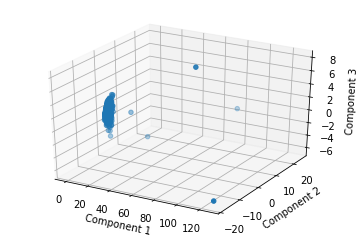

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_reduced3 = PCA(n_components = 3).fit_transform(all_datasets_vector.toarray())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

_ =ax.scatter(X_reduced3[:,0], X_reduced3[:,1], X_reduced3[:,2])
_ =ax.set_xlabel('Component 1')
_ =ax.set_ylabel('Component 2')
_ =ax.set_zlabel('Component 3')
plt.show()

In [139]:
term_frequencies = []
for j in range(0,all_datasets_vector.shape[1]):
    term_frequencies.append(sum(all_datasets_vector[:,j].toarray()))

In [140]:
term_frequencies = np.asarray(all_datasets_vector.sum(axis=0))[0]

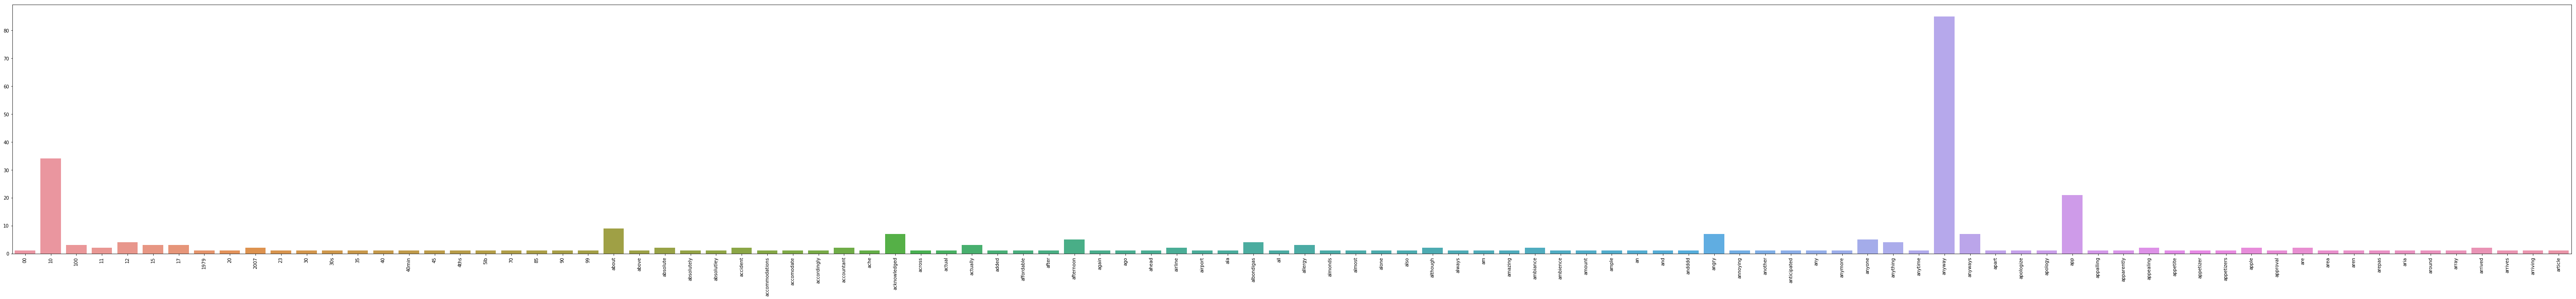

In [141]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names()[:100], rotation = 90);

In [142]:
import plotly.plotly as py
import plotly.graph_objs as go

frequency_vs_labels = pd.DataFrame({'labels':count_vect.get_feature_names()[:100], 'frequency':term_frequencies[:100]})
top_300_frequencies = frequency_vs_labels.sort_values("frequency",ascending=False).iloc()[:300]
top_300_frequencies['frequency_log'] = [math.log(i) for i in list(top_300_frequencies['frequency'])]

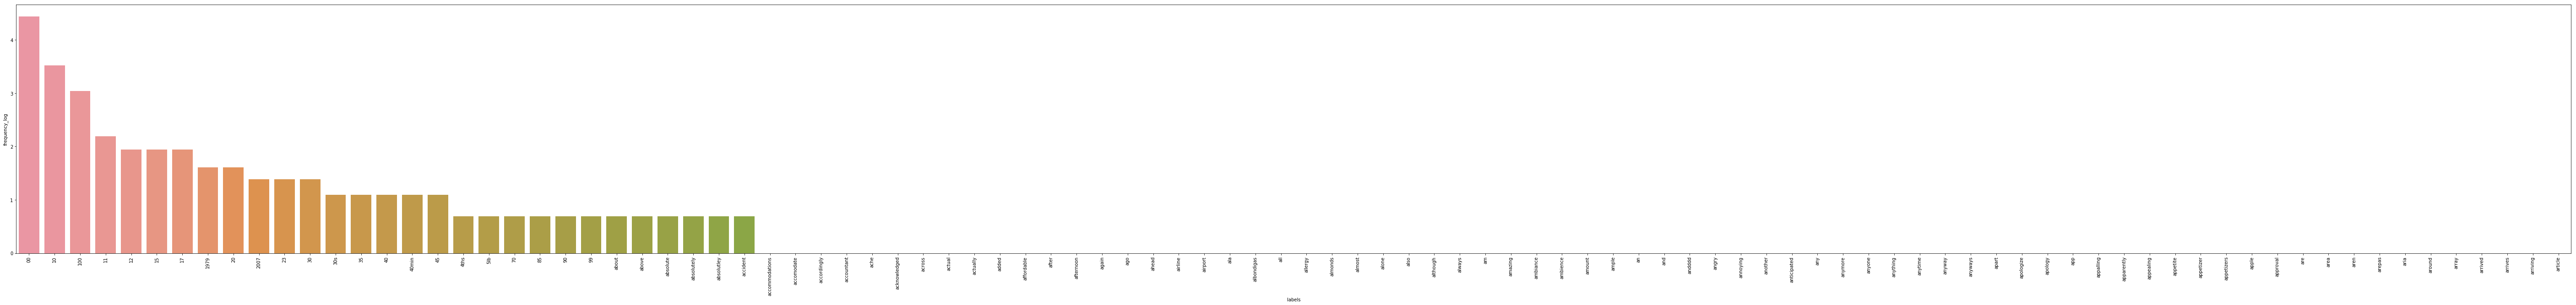

In [145]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=top_300_frequencies['labels'], 
            y=top_300_frequencies['frequency_log'])
g.set_xticklabels(count_vect.get_feature_names()[:100], rotation = 90);

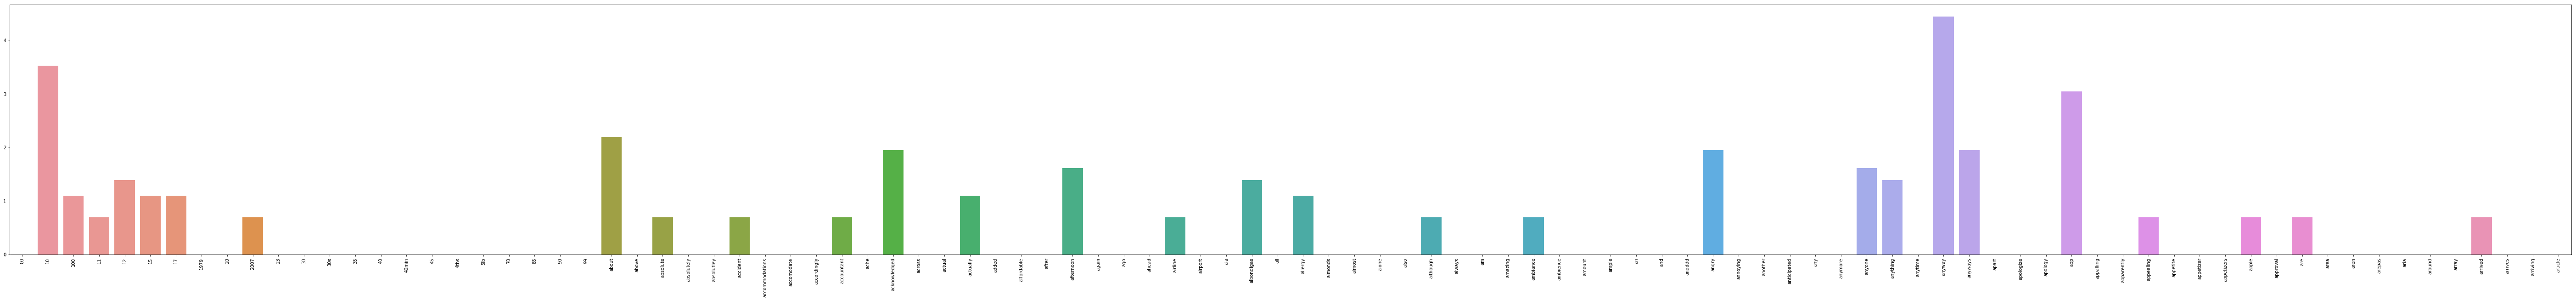

In [147]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:100],
                y=term_frequencies_log[:100])
g.set_xticklabels(count_vect.get_feature_names()[:100], rotation = 90);

# Discretization and Binarization

In [149]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(all_datasets['category'])
mlb.classes_
all_datasets['bin_category'] = mlb.transform(all_datasets['category']).tolist()

In [150]:
all_datasets.head(5)

,text,category,bin_category
0,So there is no way for me to plug it in here i...,-,[1]
1,"Good case, Excellent value.",+,[0]
2,Great for the jawbone.,+,[0]
3,Tied to charger for conversations lasting more...,-,[1]
4,The mic is great.,+,[0]


### Calculating the similarities between sentences in all dataset

Now, we're going to calculate the Cosine Similarity of each sentence in all of the dataset. Later on, we need the Cosine Similarity of each sentence to train our algorithm to classify the testing data.

In [129]:
# calculating the sentence similarity using Word Frequency feature
word_vector = vectorizer.fit_transform(all_datasets['text'])
word_vector_matrix = wf.toarray()
word_vector_corrcoef = np.corrcoef(wf_matrix)

In [128]:
# calculating the sentence similarity using TF-IDF feature
all_datasets_tfidf = tfidf_vectorizer.fit_transform(all_datasets['text'])
tfidf_matrix = all_datasets_tfidf.toarray()
tfidf_corrcoef = np.corrcoef(tfidf_matrix)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(wf_corrcoef, tfidf_corrcoef)

array([[0.9039742 , 0.12579419, 0.50188969, ..., 0.36186772, 0.54522235,
        0.74286497],
       [0.12335876, 0.93655823, 0.10748605, ..., 0.110673  , 0.09390638,
        0.13269493],
       [0.54907705, 0.12476522, 0.81800393, ..., 0.26678003, 0.46050161,
        0.62232296],
       ...,
       [0.43093027, 0.11297232, 0.26360552, ..., 0.88789203, 0.54984412,
        0.43186323],
       [0.60038688, 0.11214051, 0.457438  , ..., 0.47623684, 0.81796968,
        0.68238114],
       [0.64943258, 0.11457169, 0.49863535, ..., 0.33588201, 0.550526  ,
        0.85196931]])

### Classifity Data Using TF-IDF 

We have gotten the Cosine Similarity of each document in all database and, now, we're going to train our algorithm and feed it with the testing data see whether the precision value is high

In [151]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

tfidf_X_train, tfidf_X_test, tfidf_Y_train, tfidf_Y_test = train_test_split(tfidf_corrcoef, all_datasets['category'], test_size=0.3)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(tfidf_X_train, tfidf_Y_train)
tfidf_accuracy = bnb.score(tfidf_X_test, tfidf_Y_test)
print("Accuracy (TFIDF):", tfidf_accuracy)

Accuracy (TFIDF): 0.6122699386503068


### Classifying Data Using Word Frequency Feature

In [152]:
word_vector_X_train, word_vector_X_test, word_vector_Y_train, word_vector_Y_test = train_test_split(word_vector_corrcoef, all_datasets['category'], test_size=0.3)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(wf_X_train, wf_Y_train)
word_vector_accuracy = bnb.score(wf_X_test, wf_Y_test)
print("Accuracy (Word Vector):", word_vector_accuracy)

Accuracy (Word Vector): 0.5372144436256449
